<a href="https://colab.research.google.com/github/SawsanYusuf/Brazil-Wildfire-Visualizations/blob/main/Brazil_fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fires Analysis: Brazil Wildfires**

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fire_df = pd.read_csv("/content/amazon.csv", encoding='ISO-8859-1')
fire_df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# Data Wrangling

In [ ]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
fire_df.drop(columns = 'date', axis=1, inplace=True)

In [ ]:
fire_df['year'] = fire_df['year'].astype(str)

In [ ]:
months = {'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March', 'Abril': 'April', 
          'Maio': 'May', 'Junho': 'June', 'Julho': 'July', 'Agosto': 'August', 
          'Setembro': 'September', 'Outubro': 'October', 'Novembro': 'November', 'Dezembro': 'December'}

#mapping our translated months
fire_df['month']= fire_df['month'].map(months)

#checking the month column for the second time after the changes were made
fire_df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [ ]:
fire_df.head()

,year,state,month,number
0,1998,Acre,January,0.0
1,1999,Acre,January,0.0
2,2000,Acre,January,0.0
3,2001,Acre,January,0.0
4,2002,Acre,January,0.0


In [ ]:
fire_df.to_csv('clean_df.csv')

In [ ]:
fire_df.isnull().sum()

year      0
state     0
month     0
number    0
dtype: int64

In [ ]:
fire_df.describe()

,number
count,6454.000000
mean,108.293163
std,190.812242
min,0.000000
25%,3.000000
50%,24.000000
75%,113.000000
max,998.000000


# How many fires were reported in 20 years?

In [ ]:
fire_df.number.sum()

698924.073

# Was the number of fires increased year over year?

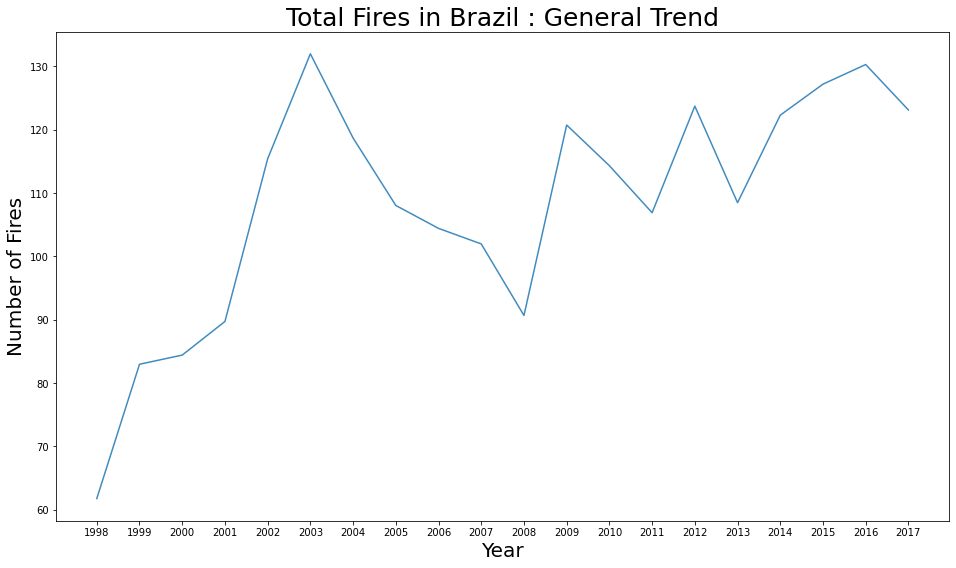

In [ ]:
plt.figure(figsize=(16,9))

sns.lineplot(x = 'year', y = 'number', data = fire_df, err_style = None ,  alpha = 0.85)
plt.title('Total Fires in Brazil : General Trend', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20);

# What year had the highest number of fires?

In [ ]:
year_fires = fire_df.groupby(by = 'year')['number'].sum()

year_fires

year
1998    20013.971
1999    26882.821
2000    27351.251
2001    29071.612
2002    37390.600
2003    42760.674
2004    38453.163
2005    35004.965
2006    33832.161
2007    33037.413
2008    29378.964
2009    39117.178
2010    37037.449
2011    34633.545
2012    40084.860
2013    35146.118
2014    39621.183
2015    41208.292
2016    42212.229
2017    36685.624
Name: number, dtype: float64

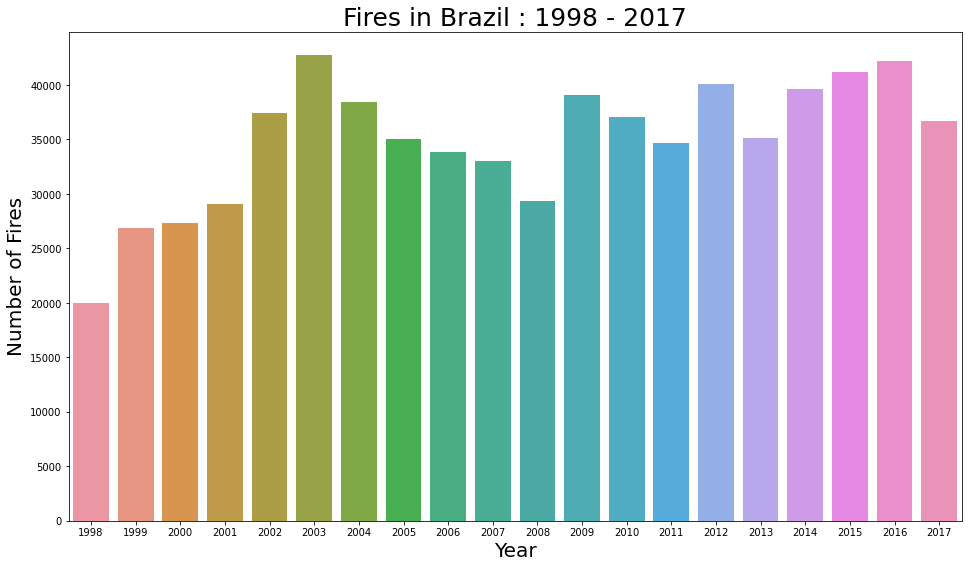

In [ ]:
plt.figure(figsize=(16,9))

sns.barplot(x = year_fires.index, y = year_fires.values)
plt.title("Fires in Brazil : 1998 - 2017", fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20);

# What month had the highest number of fires?

In [ ]:
months_fires = fire_df.groupby(by = 'month')['number'].sum()

months_fires

month
April        28188.770
August       88050.435
December     57535.480
February     30848.050
January      47747.844
July         92326.113
June         56010.675
March        30717.405
May          34731.363
November     85508.054
October      88681.579
September    58578.305
Name: number, dtype: float64

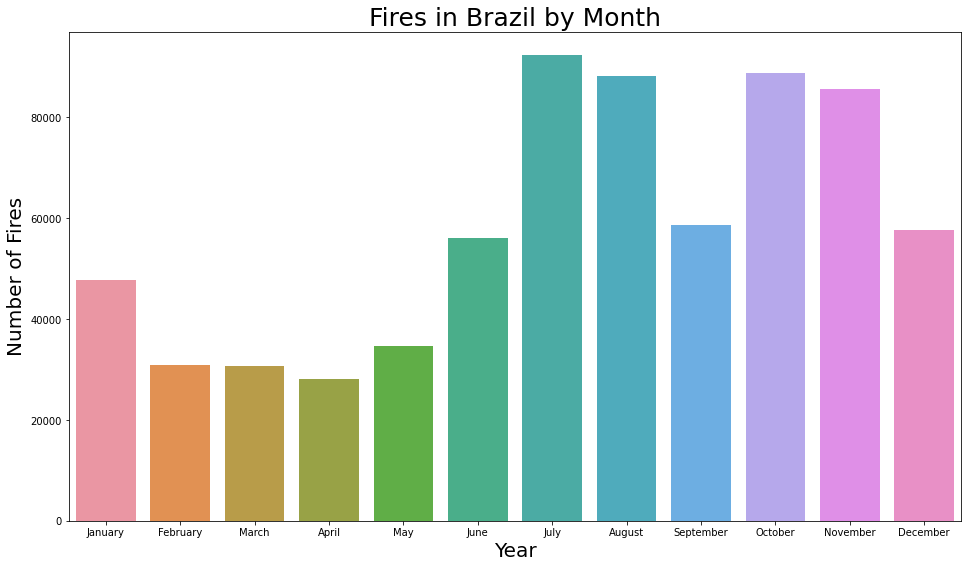

In [ ]:
plt.figure(figsize=(16,9))

sns.barplot(x = months_fires.index, 
            y = months_fires.values,
            order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']       
)
plt.title("Fires in Brazil by Month", fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20);

# What state had the highest number of fires?

In [ ]:
states_fires = fire_df.groupby(by = 'state')['number'].sum()

states_fires

state
Acre                18464.030
Alagoas              4644.000
Amapa               21831.576
Amazonas            30650.129
Bahia               44746.226
Ceara               30428.063
Distrito Federal     3561.000
Espirito Santo       6546.000
Goias               37695.520
Maranhao            25129.131
Mato Grosso         96246.028
Minas Gerais        37475.258
Paraiba             52435.918
Pará                24512.144
Pernambuco          24498.000
Piau                37803.747
Rio                 45160.865
Rondonia            20285.429
Roraima             24385.074
Santa Catarina      24359.852
Sao Paulo           51121.198
Sergipe              3237.000
Tocantins           33707.885
Name: number, dtype: float64

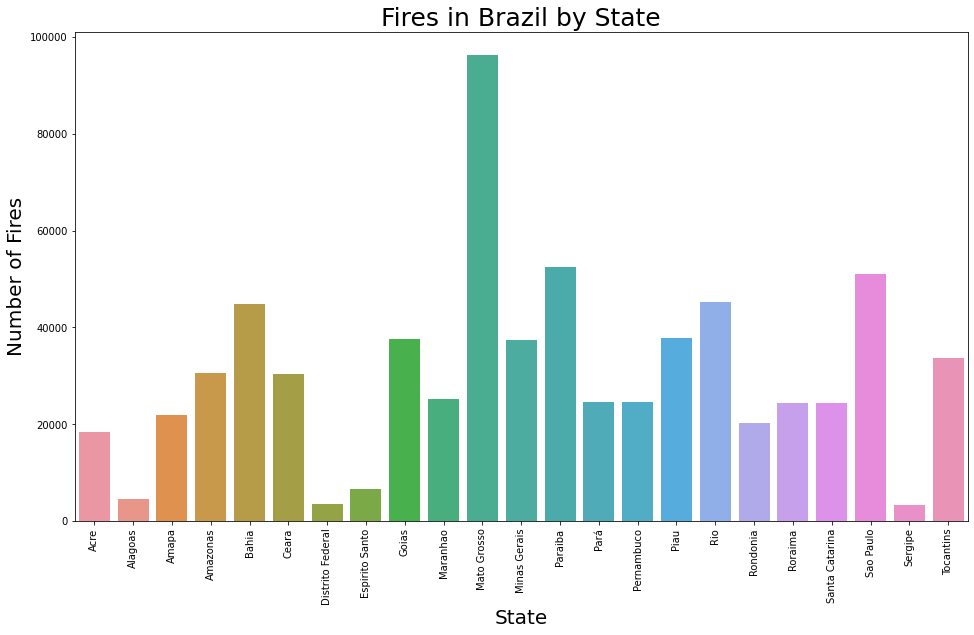

In [ ]:
plt.figure(figsize=(16,9))

sns.barplot(x = states_fires.index,
           y = states_fires.values
)
plt.xticks(rotation=90)
plt.title("Fires in Brazil by State", fontsize = 25)
plt.xlabel("State", fontsize = 20)
plt.ylabel('Number of Fires', fontsize = 20);